#Nama : Abe Randa Putra
#Email Dicoding : aberandaputra02@gmail.com

# IMPORT LIBRARIES

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# Load Dataset

In [2]:
import zipfile
local_zip = '/var/hmnist_28_28_RGB.csv.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/input/skin-cancer-mnist-ham10000')
zip_ref.close()

In [3]:
FilePath = "/input/skin-cancer-mnist-ham10000/hmnist_28_28_RGB.csv"
df = pd.read_csv(FilePath)

In [4]:
df

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,pixel0010,pixel0011,pixel0012,pixel0013,pixel0014,pixel0015,pixel0016,pixel0017,pixel0018,pixel0019,pixel0020,pixel0021,pixel0022,pixel0023,pixel0024,pixel0025,pixel0026,pixel0027,pixel0028,pixel0029,pixel0030,pixel0031,pixel0032,pixel0033,pixel0034,pixel0035,pixel0036,pixel0037,pixel0038,pixel0039,...,pixel2313,pixel2314,pixel2315,pixel2316,pixel2317,pixel2318,pixel2319,pixel2320,pixel2321,pixel2322,pixel2323,pixel2324,pixel2325,pixel2326,pixel2327,pixel2328,pixel2329,pixel2330,pixel2331,pixel2332,pixel2333,pixel2334,pixel2335,pixel2336,pixel2337,pixel2338,pixel2339,pixel2340,pixel2341,pixel2342,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,162,192,208,165,201,209,165,205,208,165,194,212,169,198,216,181,204,216,178,204,215,172,205,217,173,209,217,166,202,214,...,216,181,212,215,176,208,213,168,191,209,159,184,212,168,194,212,172,198,208,173,193,203,168,183,190,142,152,177,123,134,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,128,158,172,136,162,175,134,157,177,126,158,186,138,163,197,153,187,198,153,186,203,168,206,205,169,204,207,164,199,205,...,209,176,203,207,171,191,208,172,197,205,169,188,198,159,172,200,159,192,191,140,182,177,128,141,147,101,97,113,79,82,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,149,165,207,149,159,209,156,164,202,136,130,200,133,129,208,146,157,212,159,167,214,157,168,211,143,150,215,148,169,213,...,221,168,175,222,170,188,221,167,184,203,144,155,201,146,155,210,163,177,190,142,152,192,152,172,194,153,176,178,134,149,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,125,134,177,118,123,190,137,146,192,127,143,200,141,162,207,156,170,202,144,151,202,138,155,212,159,177,211,155,172,211,...,181,137,145,189,147,166,192,157,185,169,129,144,148,114,122,157,125,137,157,127,147,154,128,147,130,102,114,87,63,73,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,179,214,232,189,222,235,193,219,234,191,206,238,200,219,244,213,240,243,213,239,242,210,238,244,216,241,247,224,244,246,...,238,195,209,237,191,200,238,194,201,239,197,216,238,195,219,232,179,201,217,150,173,224,171,207,227,177,206,222,178,201,209,166,185,172,135,149,109,78,92,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,183,165,181,182,165,180,184,166,182,188,168,182,181,157,162,205,179,188,221,199,214,224,202,215,226,201,205,223,198,206,230,207,219,228,201,211,229,203,210,223,...,225,197,195,222,193,193,228,199,202,231,202,204,227,203,206,230,211,219,231,217,223,222,204,207,202,179,180,205,180,181,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,111,107,130,108,104,136,112,111,148,125,125,155,132,134,157,132,132,164,138,137,187,161,161,198,172,173,202,175,175,209,...,207,179,179,195,164,162,197,168,169,203,176,180,192,165,165,188,162,162,184,162,164,185,162,163,161,137,135,155,132,129,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,164,167,195,173,175,210,191,199,212,195,201,210,189,193,218,194,203,217,191,195,217,195,199,224,201,203,236,211,215,250,...,200,169,165,217,183,179,241,211,210,242,216,215,239,214,213,234,208,208,224,198,196,206,180,177,226,202,201,214,192,190,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,124,142,173,134,149,177,139,156,181,141,159,183,137,154,185,139,160,185,145,165,186,148,162,189,157,170,190,155,169,191,...,189,141,159,192,167,179,193,173,183,192,171,181,190,164,171,190,162,171,190,168,179,194,177,187,192,170,180,186,163,165,185,162,167,184,157,166,185,162,172,0

In [5]:
df = df.sample(frac = 1)
data = df.iloc[:,:-1]
labels = df.iloc[:,-1:]

In [6]:
data

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,pixel0010,pixel0011,pixel0012,pixel0013,pixel0014,pixel0015,pixel0016,pixel0017,pixel0018,pixel0019,pixel0020,pixel0021,pixel0022,pixel0023,pixel0024,pixel0025,pixel0026,pixel0027,pixel0028,pixel0029,pixel0030,pixel0031,pixel0032,pixel0033,pixel0034,pixel0035,pixel0036,pixel0037,pixel0038,pixel0039,...,pixel2312,pixel2313,pixel2314,pixel2315,pixel2316,pixel2317,pixel2318,pixel2319,pixel2320,pixel2321,pixel2322,pixel2323,pixel2324,pixel2325,pixel2326,pixel2327,pixel2328,pixel2329,pixel2330,pixel2331,pixel2332,pixel2333,pixel2334,pixel2335,pixel2336,pixel2337,pixel2338,pixel2339,pixel2340,pixel2341,pixel2342,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351
9559,197,172,181,211,185,195,225,199,209,237,209,225,242,213,233,245,217,237,244,213,233,236,204,216,245,210,225,249,213,234,249,215,235,248,213,232,249,210,227,239,...,197,231,193,202,235,198,210,240,202,218,241,205,222,240,204,220,239,203,220,232,195,212,229,192,210,220,182,199,211,170,186,216,182,196,215,182,196,212,181,196
5985,218,139,157,221,138,156,222,139,155,225,143,161,222,140,160,225,141,160,225,138,157,221,133,155,215,124,148,230,140,165,231,144,170,229,138,165,228,134,163,228,...,155,214,133,151,215,135,152,211,128,148,197,115,136,208,126,148,211,128,148,212,128,148,210,126,145,211,131,153,209,132,153,207,133,153,205,129,150,203,124,144
868,184,152,169,184,155,169,186,158,177,186,155,173,186,157,173,186,155,172,185,155,171,185,153,169,184,150,168,181,146,158,176,137,138,180,141,146,183,146,156,178,...,174,189,160,175,190,158,170,188,155,166,187,153,168,186,152,165,187,153,168,186,153,166,185,149,158,186,149,159,181,140,146,180,139,148,181,143,150,180,142,149
4652,235,172,191,237,174,194,236,173,194,237,175,195,238,175,197,235,171,194,235,171,193,232,164,188,232,161,186,231,160,183,231,159,181,223,152,172,210,136,156,230,...,186,231,165,185,229,161,182,235,171,189,219,155,171,207,141,159,234,170,190,231,172,189,234,176,192,234,176,191,232,175,190,229,170,185,230,172,186,209,152,163
2663,190,175,182,192,177,186,194,179,187,198,183,189,203,187,194,204,191,202,202,185,190,197,179,178,202,182,184,207,190,195,200,180,179,202,182,182,205,186,187,205,...,192,207,190,190,209,194,197,211,195,200,207,190,193,204,184,187,205,184,189,201,182,186,202,183,191,198,178,184,195,175,181,197,178,186,194,176,183,191,172,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5748,224,133,132,227,135,134,224,132,131,227,136,135,229,135,140,228,132,139,226,129,137,229,134,143,232,135,144,231,130,143,230,125,140,232,126,143,234,128,147,234,...,111,212,106,112,212,110,114,208,102,101,210,99,105,209,97,111,205,102,105,207,113,113,208,116,112,205,115,107,206,119,111,206,124,119,206,123,118,202,120,115
6728,199,170,155,202,177,164,205,182,168,197,169,152,195,163,142,203,177,156,205,183,158,208,188,168,208,190,172,204,185,166,205,183,165,205,182,165,198,170,149,200,...,156,204,181,151,206,185,158,205,181,162,208,188,167,205,185,159,206,186,163,208,191,168,209,192,171,206,185,162,209,190,172,205,183,163,203,180,165,196,170,160
6655,215,127,124,224,137,139,228,138,144,228,139,144,231,141,147,229,136,141,227,135,146,220,124,127,227,132,138,223,127,135,227,126,138,223,117,130,220,111,127,221,...,139,227,144,142,223,136,133,222,136,138,207,120,121,217,130,126,220,134,134,223,141,140,209,131,125,212,129,124,210,125,119,212,133,129,208,132,129,206,129,121
6517,238,153,174,241,155,179,241,155,179,239,148,172,239,149,174,243,156,182,231,143,165,238,146,169,243,156,182,247,167,192,247,171,194,247,173,194,245,168,187,245,...,171,229,147,166,220,136,154,222,137,159,225,143,162,227,146,162,227,1

In [7]:
labels

,label
9559,4
5985,4
868,2
4652,4
2663,1
...,...
5748,4
6728,4
6655,4
6517,4


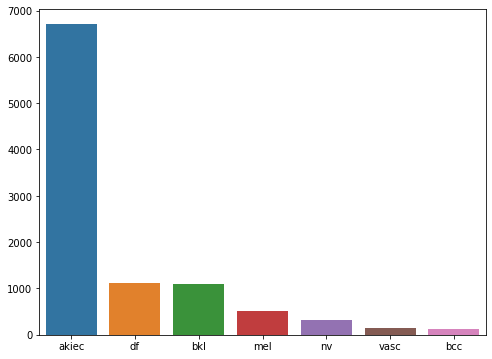

In [8]:
type_cancer = ['akiec','df','bkl','mel','nv','vasc','bcc']
counts = list(labels.value_counts())
plt.figure(figsize = (8,6))
sns.barplot(x = type_cancer, y = counts)

# Data Preparation

In [9]:
X = np.array(data)
Y = np.array(labels)


print("SHAPE OF X IS: ", X.shape)
print("SHAPE OF Y IS: ", Y.shape)

SHAPE OF X IS:  (10015, 2352)
SHAPE OF Y IS:  (10015, 1)


In [10]:
X_train , X_test , y_train , y_test = train_test_split(X , Y , test_size = 0.2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


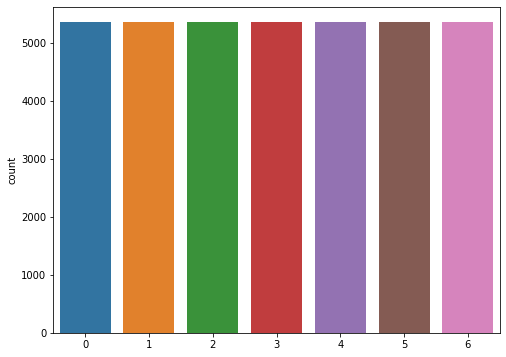

In [11]:
sampler = RandomOverSampler()
X_train, y_train = sampler.fit_resample(X_train, y_train)

plt.figure(figsize = (8,6))
sns.countplot(y_train)

In [12]:
X_train = np.array(X_train).reshape(-1,28,28,3)
X_test = np.array(X_test).reshape(-1,28,28,3)

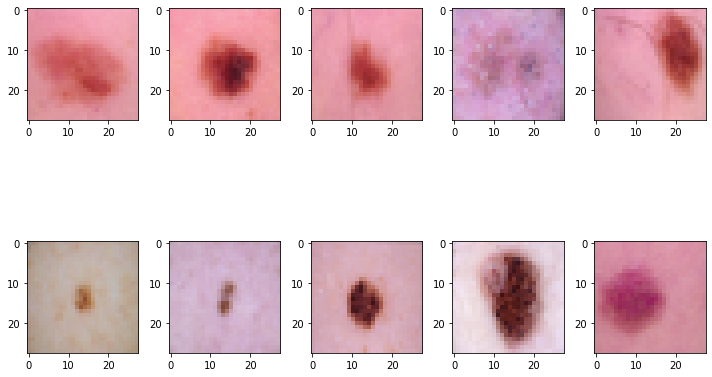

In [13]:
f , ax = plt.subplots(2,5)
f.set_size_inches(10, 10)
k = 0 
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(X_train[k])
        k = k + 1
    plt.tight_layout()

In [14]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 10,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  horizontal_flip = True,
                                  vertical_flip = True,
                                  fill_mode = 'nearest')
train_datagen.fit(X_train)

test_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen.fit(X_test)

train_data = train_datagen.flow(X_train, y_train, batch_size = 64)
test_data = test_datagen.flow(X_test, y_test, batch_size = 64)

# Modelling

In [15]:
from keras.layers import MaxPool2D

In [16]:
model = Sequential()
model.add(Conv2D(16, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))

model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(7, activation='softmax'))




learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00075,
                                    beta_1 = 0.9,
                                    beta_2 = 0.999,
                                    epsilon = 1e-8)

model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = optimizer,
              metrics = ['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 64)          3

In [17]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.95 and logs.get('val_accuracy') > 0.92):
      print("\n Training dihentikan karena telah melewati batas accuracy dan validasi")
      self.model.stop_training = True

callbacks = myCallback()

In [18]:
history = model.fit(X_train,
                    y_train,
                    batch_size = 128,
                    epochs = 15,
                    validation_split=0.2,
                    callbacks=[learning_rate_reduction, callbacks])

Epoch 1/15
235/235 [==============================] - 83s 281ms/step - loss: 1.7639 - accuracy: 0.3261 - val_loss: 1.3661 - val_accuracy: 0.4676
Epoch 2/15
235/235 [==============================] - 65s 279ms/step - loss: 0.8461 - accuracy: 0.6877 - val_loss: 1.5616 - val_accuracy: 0.4289
Epoch 3/15
235/235 [==============================] - 66s 282ms/step - loss: 0.4522 - accuracy: 0.8439 - val_loss: 1.1123 - val_accuracy: 0.5408
Epoch 4/15
235/235 [==============================] - 65s 276ms/step - loss: 0.2753 - accuracy: 0.9035 - val_loss: 0.7266 - val_accuracy: 0.6595
Epoch 5/15
235/235 [==============================] - 65s 277ms/step - loss: 0.2080 - accuracy: 0.9281 - val_loss: 0.7296 - val_accuracy: 0.6333
Epoch 6/15
235/235 [==============================] - 66s 280ms/step - loss: 0.1672 - accuracy: 0.9409 - val_loss: 1.0472 - val_accuracy: 0.5712
Epoch 7/15
235/235 [==============================] - 66s 283ms/step - loss: 0.1473 - accuracy: 0.9480 - val_loss: 0.6141 - val_ac

In [19]:
history = model.fit(X_train,
                    y_train,
                    batch_size = 64,
                    epochs = 15,
                    validation_split=0.2,
                    callbacks=[learning_rate_reduction, callbacks])

Epoch 1/15
469/469 [==============================] - 69s 148ms/step - loss: 0.1334 - accuracy: 0.9537 - val_loss: 0.3573 - val_accuracy: 0.8415
Epoch 2/15
469/469 [==============================] - 70s 150ms/step - loss: 0.0652 - accuracy: 0.9763 - val_loss: 0.4835 - val_accuracy: 0.7779
Epoch 3/15
469/469 [==============================] - 69s 148ms/step - loss: 0.0641 - accuracy: 0.9768 - val_loss: 0.2775 - val_accuracy: 0.8855
Epoch 4/15
469/469 [==============================] - 71s 151ms/step - loss: 0.0618 - accuracy: 0.9785 - val_loss: 0.3126 - val_accuracy: 0.8882
Epoch 5/15
469/469 [==============================] - 69s 147ms/step - loss: 0.0480 - accuracy: 0.9829 - val_loss: 0.2132 - val_accuracy: 0.9051
Epoch 6/15
469/469 [==============================] - 69s 146ms/step - loss: 0.0568 - accuracy: 0.9797 - val_loss: 0.2508 - val_accuracy: 0.9051
Epoch 7/15
469/469 [==============================] - 69s 147ms/step - loss: 0.0461 - accuracy: 0.9839 - val_loss: 0.4914 - val_ac

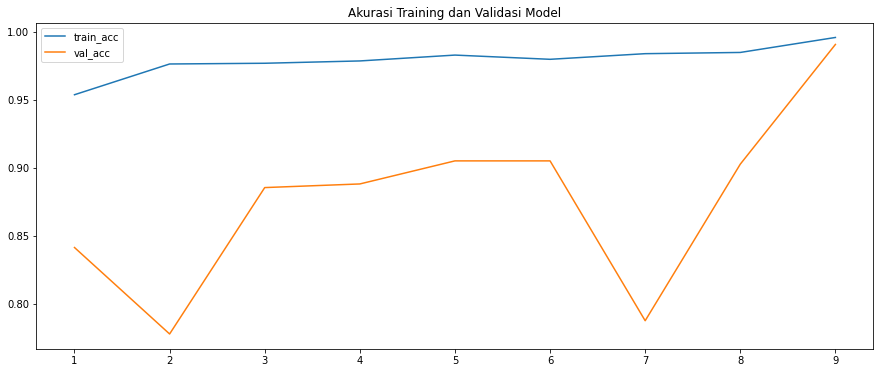

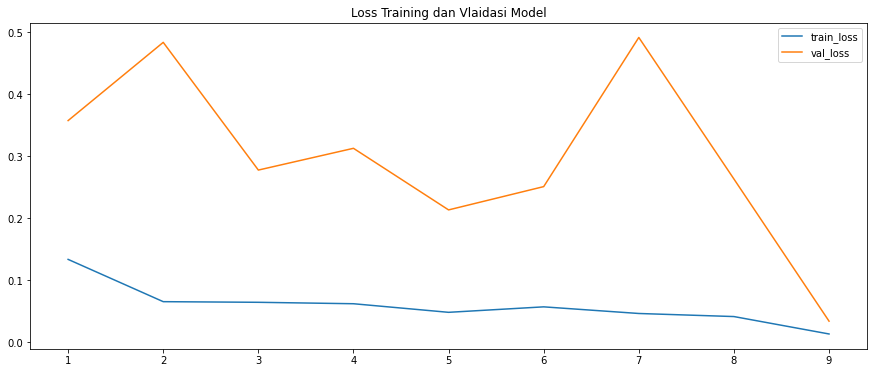

In [24]:
Acc = history.history['accuracy']
Val_Acc = history.history['val_accuracy']
epochs = range(1, len(Val_Acc) + 1)

plt.figure(figsize=(15,6))
plt.title("Akurasi Training dan Validasi Model")
plt.plot(epochs, Acc, label = 'train_acc')
plt.plot(epochs, Val_Acc, label = 'val_acc')
plt.legend()

Loss = history.history['loss']
Val_Loss = history.history['val_loss']

plt.figure(figsize=(15,6))
plt.title("Loss Training dan Vlaidasi Model")
plt.plot(epochs, Loss, label = 'train_loss')
plt.plot(epochs, Val_Loss, label = 'val_loss')
plt.legend()

# Convert TO TFLite

In [39]:
# Konversi model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmp9huc7mfm/assets


In [40]:
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)